In [1]:
import particle_motion
import numpy as np

# Построение траектории

In [23]:
solver_name = "PusherBorisRR"
field_name = "GaussEMField"
position = [0.0, 0.0, 0.0]
velocity = [0.2, 0.1, 0.0]
mass = 1.0
charge = - 1.0
electric_field = [0.0, 0.0, 0.0]
magnetic_field = [0.0, 1.0, 0.0]
time_start = 0.0
time_end = 200.0
dt = 0.1
omega_f = 1.0 # для осциллирующего поля
e_initial_phase = 0.0
b_initial_phase = 0.0


result = particle_motion.trajectory_array(
    solver_name, field_name, position, velocity,
    mass, charge, electric_field, magnetic_field, time_start, time_end, dt, 
    omega_f, e_initial_phase, b_initial_phase
)


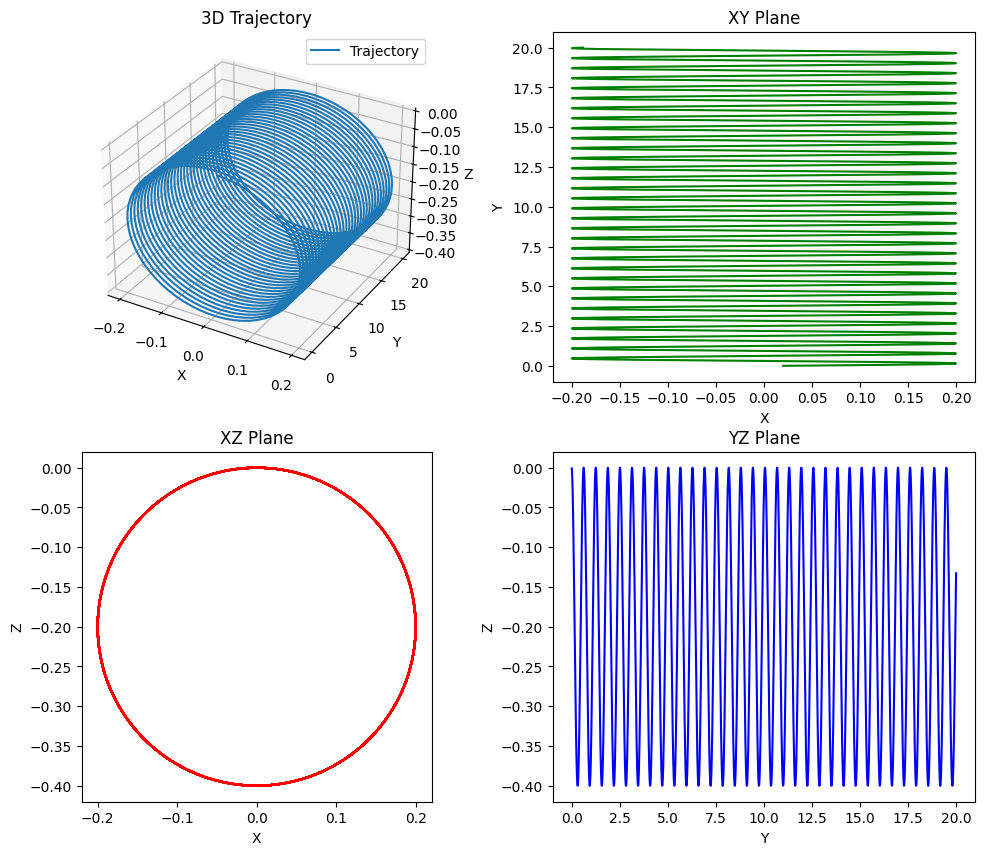

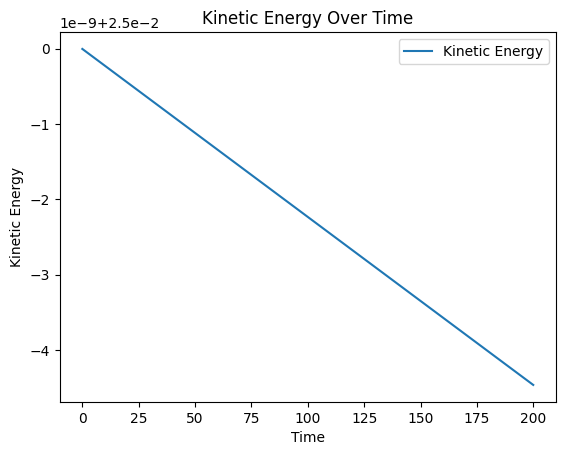

In [24]:
particle_motion.writer_trajectory(result)

# Построение спектра


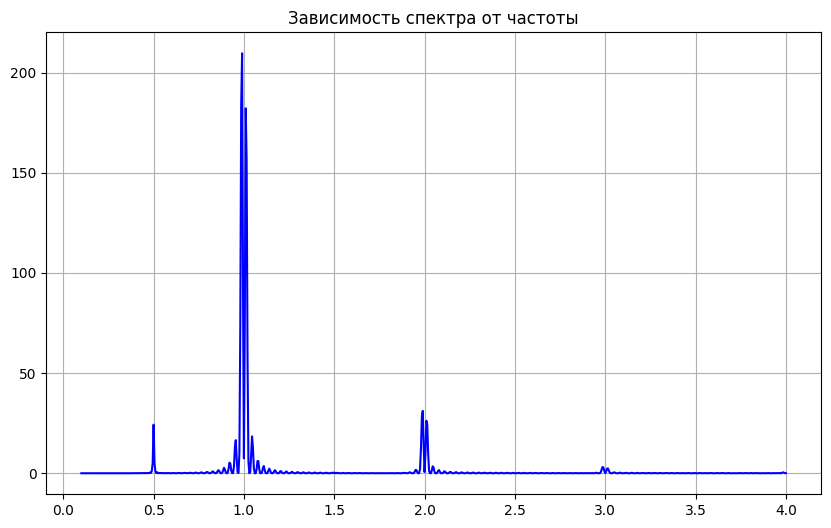

In [27]:
phi = 0
theta = np.pi/2
w_start = 0.1
w_end = 4.0
dw = 0.005
dtheta = 0.05

spectrum = particle_motion.spectrum_array(result, phi, theta, w_start, w_end, dw)
particle_motion.writer_spectrum(spectrum)


# Построение цветовой карты


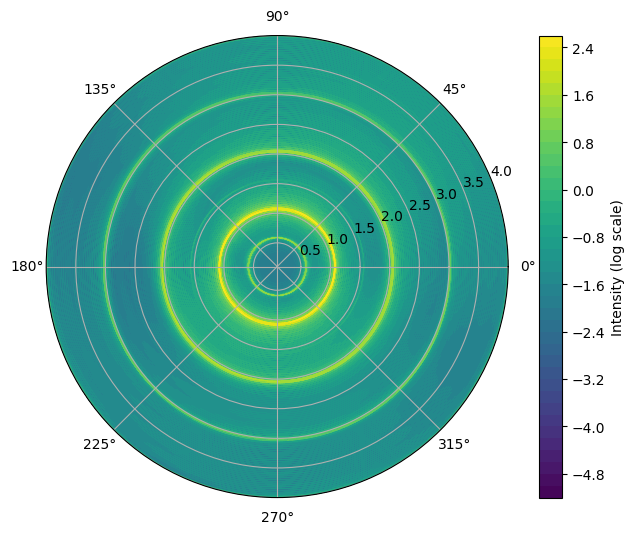

In [14]:
color_map = particle_motion.color_map_array(result, phi, theta, w_start, w_end, dw, dtheta)
particle_motion.writer_color_map(color_map, w_end)